<a href="https://colab.research.google.com/github/jinijini20/jenny1020/blob/main/Pistachio_Image_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
KAGGLE_UPLOAD =False

In [2]:
if KAGGLE_UPLOAD:
    # /content/ 폴더에 kaggle.json을 업로드 (매번 colab노트북 생성시 반복)
    from google.colab import files
    files.upload()

else:
    kaggle_username = 'leewonjeehui'
    from google.colab import userdata
    kaggle_key = userdata.get(kaggle_username)

In [3]:
import json
import os

In [4]:
def create_kaggle_json(username, key, file_path):
    # 데이터 생성
    kaggle_data = {
        "username": username,
        "key": key
    }

    # JSON 파일로 저장
    with open(file_path, 'w') as json_file:
        json.dump(kaggle_data, json_file)

    print(f"kaggle.json 파일이 '{os.path.abspath(file_path)}' 경로에 생성되었습니다.")




# kaggle.json 파일 생성 함수 호출
if KAGGLE_UPLOAD==False:
    # 사용자 정보 입력
    key = kaggle_key  # 여기에 key값을 입력하세요
    filename = 'kaggle.json'
    create_kaggle_json(kaggle_username, key, filename)


kaggle.json 파일이 '/content/kaggle.json' 경로에 생성되었습니다.


In [5]:
!cat kaggle.json

{"username": "leewonjeehui", "key": "fd62d7665f03de2ad489662114e3e96c"}

In [6]:
import os
import shutil

os.makedirs('/root/.kaggle', exist_ok=True)
path = os.getcwd()

# 파일을 복사하는데, 이미 복사된 경우 복사하지 않는다.
if not os.path.exists(os.path.join('/root/.kaggle','kaggle.json')):
    src = os.path.join(path,'kaggle.json')
    dst = os.path.join('/root/.kaggle', 'kaggle.json')
    shutil.copy(src,dst)
    print('파일 복사 완료')

파일 복사 완료


In [7]:
# 복사된 파일 확인
!ls -al /root/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Oct  4 02:09 .
drwx------ 1 root root 4096 Oct  4 02:09 ..
-rw-r--r-- 1 root root   71 Oct  4 02:09 kaggle.json


In [8]:
os.getcwd()

'/content'

In [9]:
os.listdir('/content')

['.config', 'kaggle.json', 'sample_data']

In [10]:
os.listdir('/root/.kaggle')

['kaggle.json']

In [11]:
os.getcwd()

'/content'

In [12]:
!chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets download -d muratkokludataset/pistachio-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/pistachio-image-dataset
License(s): CC-BY-NC-SA-4.0
 79% 21.0M/26.7M [00:00<00:00, 86.8MB/s]
100% 26.7M/26.7M [00:00<00:00, 58.2MB/s]


In [13]:
!ls

kaggle.json  pistachio-image-dataset.zip  sample_data


In [14]:
!unzip -qq pistachio-image-dataset.zip -d /content/dataset/

In [15]:
!ls dataset/

Pistachio_Image_Dataset


In [16]:
k_pis=os.path.join('/content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio')
s_pis=os.path.join('/content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio')

In [17]:
k_pis_files=os.listdir(k_pis)
s_pis_files=os.listdir(s_pis)
print(len( k_pis_files))
print(len( s_pis_files))

1232
916


In [18]:
import os
import shutil
import random

# 데이터셋 경로 설정
dataset_dir = "/content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset" # 데이터셋 폴더 경로로 변경 필요

# 클래스 설정
classes = ["Kirmizi_Pistachio", "Siirt_Pistachio"]

# 분할 비율 설정 (예: 훈련 80%, 검증 10%, 테스트 10%)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# 출력 폴더 생성
output_dir = "pistachio_dataset"
os.makedirs(output_dir, exist_ok=True)
for split in ["train", "valid", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# 데이터 분할 및 복사
for cls in classes:
    # 클래스별 이미지 파일 목록 가져오기
    image_files = os.listdir(os.path.join(dataset_dir, cls))
    random.shuffle(image_files)


    # 분할 인덱스 계산
    # 첫 클래스 len(image_files)=1232
    # train_split :인덱스
    train_split = int(len(image_files) * train_ratio)
    val_split = int(len(image_files)* (train_ratio+val_ratio))

    # 이미지 파일 분할 및 복사
    for i, image_file in enumerate(image_files):
        src_path = os.path.join(dataset_dir, cls, image_file)
        # train_split<862 이면 train폴더로 복사
        if i < train_split:
            dst_path = os.path.join(output_dir, "train", cls, image_file)
        # 861< val_split< 1232 이면 valid폴더로 복사
        elif i < val_split:
            dst_path = os.path.join(output_dir, "valid", cls, image_file)
        else:
            dst_path = os.path.join(output_dir, "test", cls, image_file)
        shutil.copy(src_path, dst_path)

print("데이터 분할 완료!")





데이터 분할 완료!


In [19]:
from torchvision import transforms

org_size =(256,256)
org_size =(224,224)
img_size = 224

visual_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    transforms.ToTensor(),
    ])

train_transform = transforms.Compose([
    #이미지 사이즈가 파일마다 제 각각
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [20]:
!rm -rf /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt

In [21]:
#1232, 916

data_dir = '/content/pistachio_dataset'
trainPath = os.path.join(data_dir, 'train')
validPath = os.path.join(data_dir, 'valid')
testPath = os.path.join(data_dir, 'test')

for dirname in os.listdir(trainPath):
    fullpath = os.path.join(trainPath, dirname)
    print(dirname,len(os.listdir(fullpath)))

for dirname in os.listdir(validPath):
    fullpath = os.path.join(validPath, dirname)
    print(dirname,len(os.listdir(fullpath)))

for dirname in os.listdir(testPath):
    fullpath = os.path.join(testPath, dirname)
    print(dirname,len(os.listdir(fullpath)))

Kirmizi_Pistachio 862
Siirt_Pistachio 641
Kirmizi_Pistachio 185
Siirt_Pistachio 137
Kirmizi_Pistachio 185
Siirt_Pistachio 138


In [30]:
import os
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

class PistachioDataset(Dataset):
    def __init__(self, files, root_dir, mode, transform=None):
        self.files = files
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        # Construct image path
        img_path = self.files[idx]
        img = Image.open(img_path)

        # Apply transformations, if any
        if self.transform:
            img = self.transform(img)

        # Assign label based on the filename (e.g., Kirmizi=0, Siirt=1)
        if 'Kirmizi' in self.files[idx]:
            label = 0
        elif 'Siirt' in self.files[idx]:
            label = 1
        else:
            raise ValueError(f"Unrecognized pistachio type in filename: {self.files[idx]}")

        # Return differently based on mode
        if self.mode == 'train':
            return img, np.array([label])
        else:
            return img, np.array([label]), self.files[idx]


In [25]:
# 위에서 복사된 파일들 갯수 확인하기

train_Kirmizi_path = os.path.join(trainPath,'Kirmizi_Pistachio')
train_Siirt_path = os.path.join(trainPath,'Siirt_Pistachio')
valid_Kirmizi_path = os.path.join(validPath,'Kirmizi_Pistachio')
valid_Siirt_path = os.path.join(validPath,'Siirt_Pistachio')


In [31]:
from glob import glob

train_k_pis = glob(os.path.join(train_Kirmizi_path,'*.jpg'))
train_s_pis = glob(os.path.join(train_Siirt_path,'*.jpg'))
valid_k_pis = glob(os.path.join(valid_Kirmizi_path,'*.jpg'))
valid_s_pis = glob(os.path.join(valid_Siirt_path,'*.jpg'))

import shutil
# 어? 파일명에 공백이있네!
# 하나의 폴더를 지정
dirFileList = [train_k_pis, train_s_pis, valid_k_pis, valid_s_pis]

for fileList in dirFileList:
    for filename in fileList:
        # filename에 공백을 없앤다.
        new_filename = filename.replace(" ", ".")
        #shutil로 filename을 new_filename으로 파일명 변경
        shutil.move(filename, new_filename)

In [32]:
# train_k_pis = os.listdir(train_Kirmizi_path)
# train_s_pis = os.listdir(train_Siirt_path)
# valid_k_pis = os.listdir(valid_Kirmizi_path)
# valid_s_pis = os.listdir(valid_Siirt_path)
# testdata=os.listdir(os.path.join(testPath))

In [33]:
import torch
from torch.utils.data import DataLoader, ConcatDataset

# 시각화를 위한 데이터셋
visual_kirmizi_dataset = PistachioDataset(train_k_pis, os.path.join(trainPath, 'Kirmizi_Pistachio'), 'train', transform=visual_transform)
visual_siirt_dataset = PistachioDataset(train_s_pis, os.path.join(trainPath, 'Siirt_Pistachio'), 'train', transform=visual_transform)

# 피스타치오 분류를 위한 학습 데이터셋
train_kirmizi_dataset = PistachioDataset(train_k_pis, os.path.join(trainPath, 'Kirmizi_Pistachio'), 'train', transform=train_transform)
train_siirt_dataset = PistachioDataset(train_s_pis, os.path.join(trainPath, 'Siirt_Pistachio'), 'train', transform=train_transform)

# 검증 데이터셋
valid_kirmizi_dataset = PistachioDataset(valid_k_pis, os.path.join(validPath, 'Kirmizi_Pistachio'), 'train', transform=test_transform)
valid_siirt_dataset = PistachioDataset(valid_s_pis, os.path.join(validPath, 'Siirt_Pistachio'), 'train', transform=test_transform)

# 테스트 데이터셋 (레이블 없음)
test_dataset = PistachioDataset(testdata, os.path.join(testPath), 'test', transform=test_transform)

# Kirmizi와 Siirt 데이터셋을 각각 합침
visual_dataset = ConcatDataset([visual_kirmizi_dataset, visual_siirt_dataset])
train_dataset = ConcatDataset([train_kirmizi_dataset, train_siirt_dataset])
valid_dataset = ConcatDataset([valid_kirmizi_dataset, valid_siirt_dataset])

# DataLoader 사용 예시
visual_loader = DataLoader(visual_dataset, batch_size=32, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

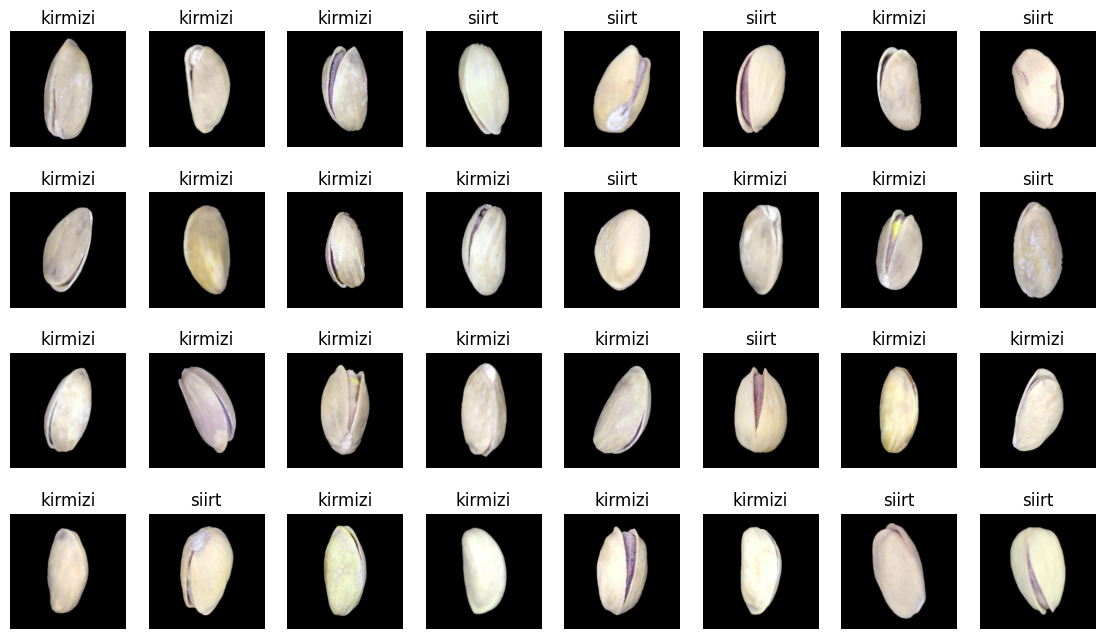

In [34]:
import matplotlib.pyplot as plt
batch_size= 32
# train데이터가 2000장이 있는데, 32장씩 데이터를 가져온다.
images, labels = next(iter(visual_loader))

classes ={0:'kirmizi',1:'siirt'}

fig = plt.figure(figsize=(14, 8))
for i in range(batch_size):
    # 4행 8열
    ax = fig.add_subplot(4, 8, i + 1)
    ax.set_title(classes[labels[i].item()])
    ax.axis('off')
    # 컬러 채널 순서를 재정렬
    ax.imshow(images[i].permute(1, 2, 0))

plt.show()

In [35]:
!pip install pytorch-ignite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.7/312.7 kB 7.1 MB/s eta 0:00:00


In [36]:
# EarlyStopping 클래스
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): 성능 개선이 없을 때 몇 번의 에포크까지 기다릴지.
            verbose (bool): True일 경우 개선될 때마다 메시지 출력.
            delta (float): 성능 개선으로 간주될 최소 변화량.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss
        # 처음에 호출됐을때는 best_score가 None이라서 초기값을 설정
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        # 지금까지의 best_score와 현재 score를 비교
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            # patience값이 모두 충족했을때, 종료조건이 만족될때
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''검증 손실이 감소하면 모델을 저장합니다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.path)  # 모델 상태 저장
        self.val_loss_min = val_loss

# EarlyStopping 인스턴스 생성 (patience=10)
early_stopping = EarlyStopping(patience=10, verbose=True, path='resnet50_best.pth')

In [41]:
import torch
from torchvision.models import resnet50, mobilenet_v3_large
device='cuda' if torch.cuda.is_available() else 'cpu'

model = resnet50(pretrained=True).to(device)

# 특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
# fc -> 분류기 in_features -> 분류기의 입력
num_features = model.fc.in_features

# num_classes: 분류해야 할 클래스 수 (예: 3개의 클래스)
num_classes = 2

# 분류기 부분을 Softmax 활성화 함수로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, num_classes),  # 입력에서 256개의 노드로 연결
).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
import time
from tqdm import tqdm

# 학습 진행
def fit(model, criterion, optimizer, epochs, train_loader, valid_loader, resume=False):

    if resume==False:
        # 그래프로 출력하기 위한 리스트
        train_losses = []
        train_accuracies = []
        valid_losses = []
        valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()

        # 훈련 모드
        model.train()

        train_loss = 0
        train_acc = 0
        train_correct = 0

        for train_x, train_y in tqdm(train_loader):
            train_x, train_y = train_x.to(device), train_y.to(device)
            optimizer.zero_grad()
            preds = model(train_x)

            loss = criterion(preds, train_y.squeeze())

            y_pred = preds.cpu()#.float()
            loss.backward()
            optimizer.step()

            # batch마다 train_loss를 누적
            train_loss += loss.item()

            # train_y와 y_pred이 같으면 correct 갯수 추가
            train_correct += y_pred.eq(train_y.cpu()).int().sum()

        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device)
                preds = model(valid_x).float()
                loss = criterion(preds, valid_y.squeeze())
                y_pred = preds.cpu()#.float()
                valid_loss += loss.item()

                valid_correct += y_pred.eq(valid_y.cpu()).sum()

                valid_correct += y_pred.eq(valid_y.cpu()).int().sum()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        scheduler.step(valid_loss)
        # 현재 learning_rate 값을 읽어올 수 있다.
        now_lr = optimizer.param_groups[0]['lr']
        print(f'learning_rate {epoch+1}: {now_lr:.8f}')

        # EarlyStopping을 호출하여 학습 중단 여부 확인
        early_stopping(valid_loss, model)

        # 학습 중단 조건을 충족하면 break
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
        print('-' * 70)


    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

100%|██████████| 47/47 [00:22<00:00,  2.08it/s]


25.056sec : [Epoch 1/25] -> train loss: 0.4237, train acc: 0.000% / valid loss: 0.2227, valid acc: 0.000%
learning_rate 1: 0.00001000
Validation loss decreased (inf --> 2.449574).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:21<00:00,  2.17it/s]


23.970sec : [Epoch 2/25] -> train loss: 0.1093, train acc: 0.000% / valid loss: 0.0707, valid acc: 0.000%
learning_rate 2: 0.00001000
Validation loss decreased (2.449574 --> 0.777811).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:21<00:00,  2.16it/s]


24.101sec : [Epoch 3/25] -> train loss: 0.0565, train acc: 0.000% / valid loss: 0.0477, valid acc: 0.000%
learning_rate 3: 0.00001000
Validation loss decreased (0.777811 --> 0.524779).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:21<00:00,  2.14it/s]


24.269sec : [Epoch 4/25] -> train loss: 0.0230, train acc: 0.000% / valid loss: 0.0355, valid acc: 0.000%
learning_rate 4: 0.00001000
Validation loss decreased (0.524779 --> 0.390792).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.12it/s]


24.521sec : [Epoch 5/25] -> train loss: 0.0204, train acc: 0.000% / valid loss: 0.0344, valid acc: 0.000%
learning_rate 5: 0.00001000
Validation loss decreased (0.390792 --> 0.378877).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:23<00:00,  2.03it/s]


25.642sec : [Epoch 6/25] -> train loss: 0.0101, train acc: 0.000% / valid loss: 0.0303, valid acc: 0.000%
learning_rate 6: 0.00001000
Validation loss decreased (0.378877 --> 0.333133).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.06it/s]


25.197sec : [Epoch 7/25] -> train loss: 0.0166, train acc: 0.000% / valid loss: 0.0456, valid acc: 0.000%
learning_rate 7: 0.00001000
EarlyStopping counter: 1 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.11it/s]


24.654sec : [Epoch 8/25] -> train loss: 0.0194, train acc: 0.000% / valid loss: 0.0258, valid acc: 0.000%
learning_rate 8: 0.00001000
Validation loss decreased (0.333133 --> 0.283329).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.09it/s]


24.942sec : [Epoch 9/25] -> train loss: 0.0103, train acc: 0.000% / valid loss: 0.0306, valid acc: 0.000%
learning_rate 9: 0.00001000
EarlyStopping counter: 1 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.09it/s]


24.800sec : [Epoch 10/25] -> train loss: 0.0055, train acc: 0.000% / valid loss: 0.0266, valid acc: 0.000%
learning_rate 10: 0.00001000
EarlyStopping counter: 2 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.09it/s]


24.906sec : [Epoch 11/25] -> train loss: 0.0036, train acc: 0.000% / valid loss: 0.0248, valid acc: 0.000%
learning_rate 11: 0.00001000
Validation loss decreased (0.283329 --> 0.273257).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.08it/s]


25.195sec : [Epoch 12/25] -> train loss: 0.0033, train acc: 0.000% / valid loss: 0.0227, valid acc: 0.000%
learning_rate 12: 0.00001000
Validation loss decreased (0.273257 --> 0.249367).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.12it/s]


26.158sec : [Epoch 13/25] -> train loss: 0.0062, train acc: 0.000% / valid loss: 0.0274, valid acc: 0.000%
learning_rate 13: 0.00001000
EarlyStopping counter: 1 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:23<00:00,  2.04it/s]


25.798sec : [Epoch 14/25] -> train loss: 0.0074, train acc: 0.000% / valid loss: 0.0192, valid acc: 0.000%
learning_rate 14: 0.00001000
Validation loss decreased (0.249367 --> 0.211495).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 47/47 [00:23<00:00,  2.04it/s]


25.482sec : [Epoch 15/25] -> train loss: 0.0073, train acc: 0.000% / valid loss: 0.0247, valid acc: 0.000%
learning_rate 15: 0.00001000
EarlyStopping counter: 1 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.09it/s]


24.873sec : [Epoch 16/25] -> train loss: 0.0029, train acc: 0.000% / valid loss: 0.0273, valid acc: 0.000%
learning_rate 16: 0.00001000
EarlyStopping counter: 2 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.08it/s]


24.949sec : [Epoch 17/25] -> train loss: 0.0025, train acc: 0.000% / valid loss: 0.0240, valid acc: 0.000%
learning_rate 17: 0.00001000
EarlyStopping counter: 3 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.08it/s]


24.997sec : [Epoch 18/25] -> train loss: 0.0017, train acc: 0.000% / valid loss: 0.0280, valid acc: 0.000%
learning_rate 18: 0.00000500
EarlyStopping counter: 4 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.09it/s]


24.862sec : [Epoch 19/25] -> train loss: 0.0026, train acc: 0.000% / valid loss: 0.0273, valid acc: 0.000%
learning_rate 19: 0.00000500
EarlyStopping counter: 5 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.09it/s]


24.839sec : [Epoch 20/25] -> train loss: 0.0020, train acc: 0.000% / valid loss: 0.0294, valid acc: 0.000%
learning_rate 20: 0.00000500
EarlyStopping counter: 6 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.06it/s]


25.221sec : [Epoch 21/25] -> train loss: 0.0011, train acc: 0.000% / valid loss: 0.0247, valid acc: 0.000%
learning_rate 21: 0.00000500
EarlyStopping counter: 7 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.07it/s]


25.053sec : [Epoch 22/25] -> train loss: 0.0019, train acc: 0.000% / valid loss: 0.0219, valid acc: 0.000%
learning_rate 22: 0.00000250
EarlyStopping counter: 8 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.10it/s]


25.300sec : [Epoch 23/25] -> train loss: 0.0012, train acc: 0.000% / valid loss: 0.0213, valid acc: 0.000%
learning_rate 23: 0.00000250
EarlyStopping counter: 9 out of 10
----------------------------------------------------------------------


100%|██████████| 47/47 [00:22<00:00,  2.07it/s]


25.171sec : [Epoch 24/25] -> train loss: 0.0012, train acc: 0.000% / valid loss: 0.0239, valid acc: 0.000%
learning_rate 24: 0.00000250
EarlyStopping counter: 10 out of 10
Early stopping triggered.


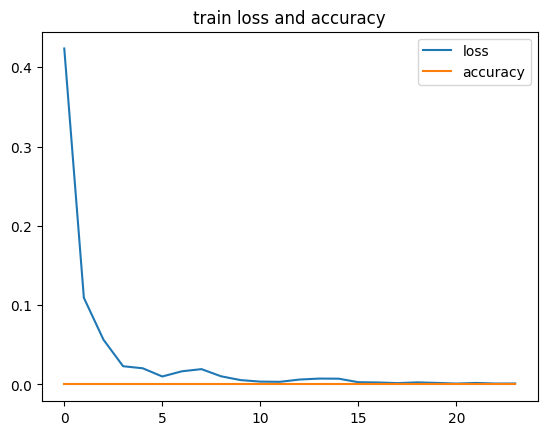

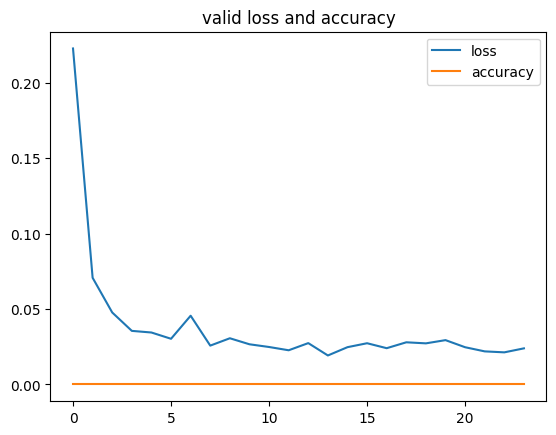

In [43]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

LR = 0.00001
EPOCHS = 25
# 손실함수
# 신경망에 sigmoid를 썼으므로 BCELoss()사용
# 만약 신경망에 softmax를 썼다면 CELoss()사용
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer정의
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# scheduler 추가
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 학습
fit(model, criterion, optimizer, EPOCHS, train_loader, valid_loader, resume=False)